# Preprocessing Notes

I believe there are 2 crucial components to this experiment that are **more important** than type of Neural Network:
- collection of good data with various scenarios
- preporcesing of the images to remove unnecessary training burden

## Steps 

- Crop the images
- Apply mask to leave only essential data
- Grayscale (see "Conclusions and assumptions")
- Blur the image to remove pixelation and smooth the embankments
- POSSIBLY: Detect "Canny Edges"
- POSSIBLY: Use Hugh algorithm to connect dots (draw lines)
- POSSIBLY: throw out **everything** else except left/right lanes
- Scale down the images to 28x28 if possible
- Visually verify all kinds of landscapes 
    - if I (human) can tell immediately how to steer then I can teach Neural Network to do so, too.

In [1]:
data_dir = "../../../DATA/behavioral_cloning_data/"
image_final_width = 64
driving_data_csv = "driving_log_no_zeros.csv"
processed_images_dir = "processed_images_64/"

# Read CSV spreadsheet

In [2]:
import csv

import DataHelper
#print(DataHelper.__doc__)
from DataHelper import test_read_csv, read_csv
#print(read_csv.__doc__)

headers, data = read_csv(data_dir + driving_data_csv)
print("headers \n", headers)
print("sample of data \n", data[3])

Using TensorFlow backend.


imported rows 3679
headers 
 ['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed']
sample of data 
 ['IMG/center_2016_12_01_13_39_27_420.jpg'
 'IMG/left_2016_12_01_13_39_27_420.jpg'
 'IMG/right_2016_12_01_13_39_27_420.jpg' '0.6550089' '0.9855326' '0'
 '30.12057']


## Spot-check retrieved data

In [3]:
from DataHelper import get_speed_values, get_steering_values
from DataHelper import get_image_center_values

image_center_values = get_image_center_values(data)
print("center camera values", image_center_values[53]) 

speed_values = get_speed_values(data)
print("speed values", speed_values[53]) 

steering_values = get_steering_values(data)
print("steering values", steering_values[53]) 

center camera values IMG/center_2016_12_01_13_45_07_941.jpg
speed values 30.18524
steering values 0.415796


# Steering value distribution

It appears, as expected that most of the driving is straight and the allowed values are from -1 to +1.

Most values are in the -0.25 to +0.25 range.

I would **err on the prudent side** and avoid the values above |0.25|.

min_value -0.942695
max_value 1.0
spread 1.9427
recommended number of classes 39


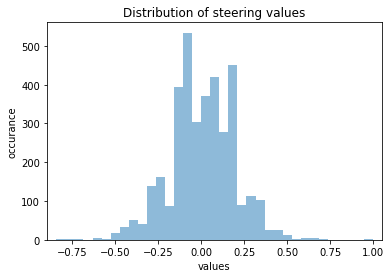

In [4]:
from DataHelper import plot_histogram

change_step=0.05 # test data changes
plot_histogram("steering values", steering_values, change_step)

# Speed value distribution

It appears, most of the driving is done at top speed of 30mph.

There is no sense to change speed in smaller increments than 1 mph.

min_value 1.374433
max_value 30.63181
spread 29.257377
recommended number of classes 30


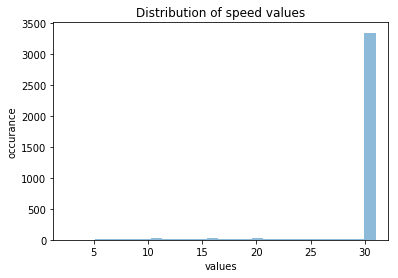

In [5]:
change_step=1 # test data changes
plot_histogram("speed values", speed_values, change_step)

# Preprocess a random sample image

sample speed value 30.1869
IMG/center_2016_12_01_13_43_12_991.jpg
sample image 2050 ../../../DATA/behavioral_cloning_data/IMG/center_2016_12_01_13_43_12_991.jpg

    Returns:
    <class 'PIL.JpegImagePlugin.JpegImageFile'>
    
<class 'PIL.JpegImagePlugin.JpegImageFile'>
Original (160, 320, 3)


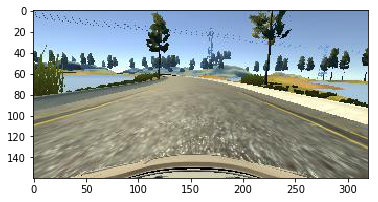

my image (70, 320, 3)


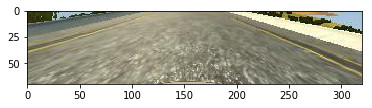

grayscale (70, 320)


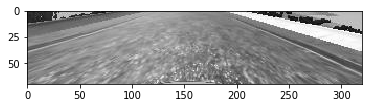

gaussian_blur (70, 320)


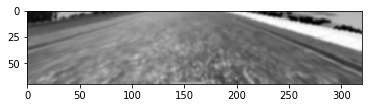

canny (70, 320)


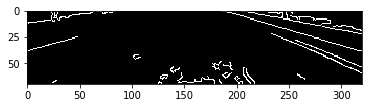

hough_lines (70, 320, 3)


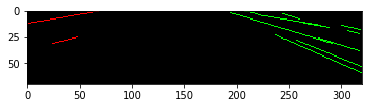

resize_image_maintain_ratio (14, 64, 3)


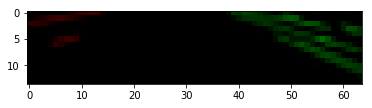

normalize_grayscale (14, 64, 3)


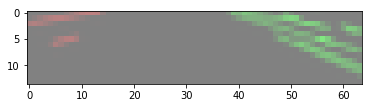

In [10]:
import random
import matplotlib.pyplot as plt
from ImageHelper import preprocessing_pipline, print_image

image_index = random.randrange(len(speed_values))
print("sample speed value", speed_values[image_index])
print(image_center_values[image_index])
image_path = data_dir + image_center_values[image_index] # TODO rename to image_names_center_cam
print("sample image", image_index, image_path)

from ImageHelper import read_image_binary
print(read_image_binary.__doc__)
image = read_image_binary(image_path)
print(type(image))
print_image(image, should_plot=True, comment="Original")

image = preprocessing_pipline(image, final_size=image_final_width, should_plot=True)

In [7]:
print(image[0][0:15]) # verify the image is encoded to values from -0.5 to 0.5

[[-0.5        -0.5        -0.5       ]
 [-0.5        -0.5        -0.5       ]
 [-0.5        -0.5        -0.5       ]
 [-0.47647059 -0.5        -0.5       ]
 [-0.40980392 -0.5        -0.5       ]
 [-0.34705882 -0.5        -0.5       ]
 [-0.29607843 -0.5        -0.5       ]
 [-0.31960784 -0.5        -0.5       ]
 [-0.49215686 -0.5        -0.5       ]
 [-0.49607843 -0.5        -0.5       ]
 [-0.5        -0.5        -0.5       ]
 [-0.5        -0.5        -0.5       ]
 [-0.49215686 -0.5        -0.5       ]
 [-0.5        -0.5        -0.5       ]
 [-0.5        -0.5        -0.5       ]]


# Convert ALL of the images and save them

In [8]:
def process_all(image_list, processed_images_dir, image_final_width=64):
    
    import scipy
    import scipy.misc
    from scipy.misc import imsave
    
    for image_index in range( len(image_list) ): # only first 5 items image_list[5]
        image_name = image_center_values[image_index]
        image_path = data_dir + image_name
        image = read_image_binary(image_path)
        image_array = preprocessing_pipline(image, final_size=image_final_width, should_plot=False)
        imsave( processed_images_dir + image_name, image_array)
    return

processed_images_dir = data_dir + processed_images_dir + "/"
print("make sure that this directory exists: ", processed_images_dir)


make sure that this directory exists:  ../../../DATA/behavioral_cloning_data/processed_images_64//


In [11]:
process_all(image_center_values, processed_images_dir, image_final_width)

/Users/ukilucas/dev/carnd/p3_behavioral_cloning/p3_UkiDLucas/ImageHelper.py:284: RuntimeWarning: divide by zero encountered in int_scalars
  slope = rise/run
